## LABORATORIO 05: Análisis de Paquetes de Red 

Alexa Bravo  18831  
Abril 08, 2022

### PARTE 01 - Análisis de Paquetes

#### Análisis Estadístico 

In [1]:
#Importamos las librerias 
from scapy.all import * 
import pandas as pd 
import numpy as np 
import binascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Capturamos 100 paquetes. 
paquetesCap = 100
pcap = sniff(count=paquetesCap)
 
print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:24 UDP:58 ICMP:0 Other:18>


<Ether  dst=ff:ff:ff:ff:ff:ff src=84:5c:f3:59:57:ef type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=291 id=37719 flags= frag=0 ttl=128 proto=udp chksum=0x0 src=192.168.0.9 dst=192.168.0.255 |<UDP  sport=54915 dport=54915 len=271 chksum=0xd2d0 |<Raw  load='\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\x00\x00\x10\\xf5\x03>\\xcc\x01\x00\x00\\xc0\\xb7\\xef\x1a\x0f\x00\x00\x00\x00\x00\x08;\\xcc\x01\x00\x003\'\x00\x00\x00\x00\x00\x00\x00\\xf5\x03>\\xcc\x01\x00\x00\\xf0{#;\\xcc\x01\x00\x00 \\x90\x01@\\xcc\x01\x00\x00\\x80\\xbb\\xef\x1a\x0f\x00\x00\x00\\xc6t"H\\xff\x7f\x00\x00\x07\x01\x00\x00\x00\x00\x00\x00\\xa0\\xb9\\xef\x1a\x0f\x00\x00\x00@V\\x8f=\\xcc\x01\x00\x00\x00\\xed\\xc5A\\xcc\x01\x00\x00H\x1f\x08{81492afa-f489-49da-9dc4-862a96ba5fd7}\x00";\\xcc\x01\x00\x00\\xa0\\xb9\\xef\x1a\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00@\\xb8\\xef\x1a\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [3]:
#Cargamos el archivo pcap
pcapArch = "analisis_paquetes.pcap"
pcapArch = rdpcap(pcapArch)

In [4]:
#Juntamos los pcaps 
pcapFinal = pcap + pcapArch
print(pcapFinal)

<Sniffed+analisis_paquetes.pcap: TCP:24 UDP:120 ICMP:0 Other:18>


In [5]:
#Convertimos el pcap a PDF 
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

df = pd.DataFrame(columns=dataframe_fields)
for packet in pcapFinal[IP]:
    field_values = []
    for field in ip_fields:
        if field == 'options':
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))

    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)


df = df.reset_index()
df = df.drop(columns="index")
df.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,291,37719,,0,128,17,0,...,None,None,None,None,53968,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
1,4,5,0,291,37720,,0,128,17,0,...,None,None,None,None,43206,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
2,4,5,0,291,37721,,0,128,17,0,...,None,None,None,None,36909,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
3,4,5,0,76,6649,DF,0,128,6,0,...,5,0,PA,252,23890,0,0,36,b'\x17\x03\x03\x00\x1f\n\xe1\xaf[%\xda\x7fw\xc...,b'170303001f0ae1af5b25da7f77c18ebecc7c3c116da7...
4,4,5,0,40,64262,DF,0,219,6,18357,...,5,0,A,134,55981,0,None,6,b'\x00\x00\x00\x00\x00\x00',b'000000000000'


In [6]:
#Mostramos los valores de las columnas 'Src Addres', 'Dst Address', 'Src Port' y 'Dst Port'.
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,192.168.0.9,192.168.0.255,54915,54915
1,192.168.0.9,192.168.0.255,54915,54915
2,192.168.0.9,192.168.0.255,54915,54915
3,192.168.0.9,35.171.120.183,36169,443
4,35.171.120.183,192.168.0.9,443,36169
...,...,...,...,...
105,84.54.22.33,10.1.10.53,53,53
106,10.1.10.53,84.54.22.33,53,53
107,84.54.22.33,10.1.10.53,53,53
108,10.1.10.53,84.54.22.33,53,53


##### Estadísticas

In [7]:
#a. Muestre cual es la IP origen que más aparece
frequent_src = df['src'].describe()['top']
print("La IP origen que mas aparece es:", frequent_src)

La IP origen que mas aparece es: 192.168.0.9


In [8]:
#b. Muestre cual es la IP destino que más aparece 
frequent_dst = df['dst'].describe()['top']
print("La IP destino que mas aparece es:", frequent_dst)

La IP destino que mas aparece es: 10.1.10.53


In [9]:
#c. ¿A qué IPs se comunica la IP del inciso a? 
print("Las IPs que se comunican a la IP del inciso a son: ", df[df['src'] == frequent_src]['dst'].unique()) 

Las IPs que se comunican a la IP del inciso a son:  ['192.168.0.255' '35.171.120.183' '51.104.162.168' '52.114.158.118'
 '35.186.224.47' '224.0.0.251' '224.0.0.252']


In [10]:
#d. ¿A qué puertos destino se comunica la IP del inciso a? 
print("Los puertos destino que se comunican a la IP del inciso a son: ", df[df['src'] == frequent_src]['dport'].unique()) 

Los puertos destino que se comunican a la IP del inciso a son:  [54915 443 137 5353 5355]


In [11]:
#e. ¿A qué puertos origen se comunica la IP del inciso a? 
print("Los puertos origen que se comunican a la IP del inciso a son: ", df[df['src'] == frequent_src]['sport'].unique()) 

Los puertos origen que se comunican a la IP del inciso a son:  [54915 36169 2537 2027 1958 137 5353 61626 52735 54143 50472]


In [12]:
#f. ¿Para que se utiliza el puerto que más aparece en el inciso  d y e? 
print("Se utilizan para el protocolo TCP, ya que es un protocolo que maneja la comunicación bidireccional")

Se utilizan para el protocolo TCP, ya que es un protocolo que maneja la comunicación bidireccional


##### Gráficas

<AxesSubplot:xlabel='count', ylabel='src'>

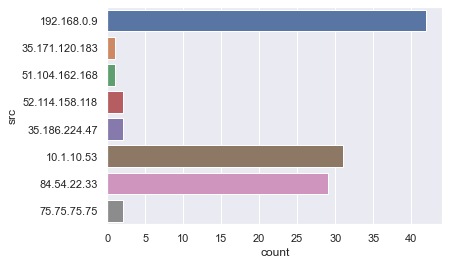

In [13]:
#a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads enviados de dichas direcciones. 
sns.countplot(
    data = df,
    y = 'src',
)

<AxesSubplot:xlabel='count', ylabel='dst'>

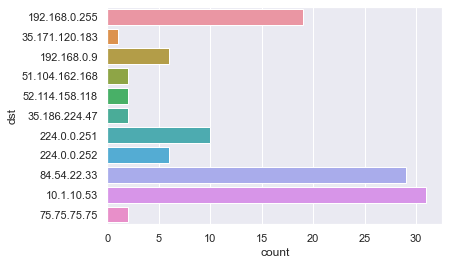

In [14]:
#b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads recibidos en dichas direcciones.
sns.countplot(
    data = df,
    y = 'dst',
)

<AxesSubplot:xlabel='count', ylabel='sport'>

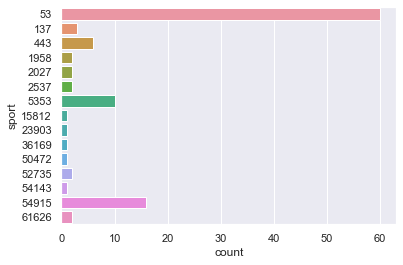

In [15]:
#c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los payloads enviados de dichos puertos. 
sns.countplot(
    data = df,
    y = 'sport',
)

<AxesSubplot:xlabel='count', ylabel='dport'>

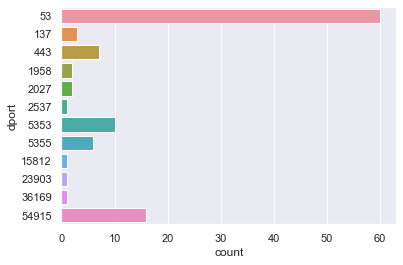

In [16]:
#d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los payloads recibidos en dichos puertos. 
sns.countplot(
    data = df,
    y = 'dport',
)

##### Investigación del Payload

In [17]:
#a. Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen más frecuente. 
dfsrc = df[df['src'] == frequent_src]
dfsrc.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,291,37719,,0,128,17,0,...,None,None,None,None,53968,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
1,4,5,0,291,37720,,0,128,17,0,...,None,None,None,None,43206,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
2,4,5,0,291,37721,,0,128,17,0,...,None,None,None,None,36909,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
3,4,5,0,76,6649,DF,0,128,6,0,...,5,0,PA,252,23890,0,0,36,b'\x17\x03\x03\x00\x1f\n\xe1\xaf[%\xda\x7fw\xc...,b'170303001f0ae1af5b25da7f77c18ebecc7c3c116da7...
5,4,5,0,40,28030,DF,0,128,6,0,...,5,0,FA,256,38620,0,None,0,b'',b''


In [18]:
#b. Obtenga un nuevo DF con las columnas 'Src Address', 'Dst Address' y agrúpelas por payload 
dfsd = dfsrc .groupby(by = ['payload'])
dfsd = dfsd[['src', 'dst', 'payload']]
dfsd.head(5)

,src,dst,payload
0,192.168.0.9,192.168.0.255,263
1,192.168.0.9,192.168.0.255,263
2,192.168.0.9,192.168.0.255,263
3,192.168.0.9,35.171.120.183,36
5,192.168.0.9,51.104.162.168,0
6,192.168.0.9,192.168.0.255,263
8,192.168.0.9,51.104.162.168,0
9,192.168.0.9,192.168.0.255,263
15,192.168.0.9,52.114.158.118,0
16,192.168.0.9,52.114.158.118,178


In [19]:
#c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente.  Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.  
ipBytes = dfsrc['dst'].unique()
dfsrc['dst'].value_counts()

192.168.0.255     19
224.0.0.251       10
224.0.0.252        6
52.114.158.118     2
35.186.224.47      2
51.104.162.168     2
35.171.120.183     1
Name: dst, dtype: int64

In [20]:
ipSos = ipBytes[0]
print("La IP sospechosa por la cantidad de Bytes intercambiados es:", ipSos)

La IP sospechosa por la cantidad de Bytes intercambiados es: 192.168.0.255


In [21]:
#d. Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa.
dfFrecSos = df[(df['src'] == frequent_src) & (df['dst'] == ipSos)]
dfFrecSos.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,291,37719,,0,128,17,0,...,None,None,None,None,53968,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
1,4,5,0,291,37720,,0,128,17,0,...,None,None,None,None,43206,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
2,4,5,0,291,37721,,0,128,17,0,...,None,None,None,None,36909,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
6,4,5,0,291,37722,,0,128,17,0,...,None,None,None,None,64196,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
9,4,5,0,291,37723,,0,128,17,0,...,None,None,None,None,33771,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...


In [22]:
#e. Obtenga los payloads del DF del inciso 6, y añada cada uno en un array. 
arrayDF = dfFrecSos['payload_raw'].to_numpy()

In [23]:
#f. Muestre el contenido del array. 
arrayDF

array([b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\x00\x00\x10\xf5\x03>\xcc\x01\x00\x00\xc0\xb7\xef\x1a\x0f\x00\x00\x00\x00\x00\x08;\xcc\x01\x00\x003\'\x00\x00\x00\x00\x00\x00\x00\xf5\x03>\xcc\x01\x00\x00\xf0{#;\xcc\x01\x00\x00 \x90\x01@\xcc\x01\x00\x00\x80\xbb\xef\x1a\x0f\x00\x00\x00\xc6t"H\xff\x7f\x00\x00\x07\x01\x00\x00\x00\x00\x00\x00\xa0\xb9\xef\x1a\x0f\x00\x00\x00@V\x8f=\xcc\x01\x00\x00\x00\xed\xc5A\xcc\x01\x00\x00H\x1f\x08{81492afa-f489-49da-9dc4-862a96ba5fd7}\x00";\xcc\x01\x00\x00\xa0\xb9\xef\x1a\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00@\xb8\xef\x1a\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcc\x01\x00\x00B\xea\x04\rmO\x00\x00\x8aQrB\xff\x7f\x00\x00\x07\x01\x00^\xa4:\xf7',
       b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\x00\x00\x10\xf5\x03>\xcc\x01\x00\x00\xc0\xb7\xef\x1a\x0f\x00\x00\x00\x00\x00\x08;\xcc\x01\x00\x003\'\x00\x00\x00\x00\x00\x00\x00\x

In [24]:
#g. Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido que se envie a través del puerto explicado en el inciso f? 
dfFrecSos[['payload', 'payload_raw', 'src', 'sport', 'dst', 'dport']]
dfFrecSos.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,291,37719,,0,128,17,0,...,None,None,None,None,53968,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
1,4,5,0,291,37720,,0,128,17,0,...,None,None,None,None,43206,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
2,4,5,0,291,37721,,0,128,17,0,...,None,None,None,None,36909,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
6,4,5,0,291,37722,,0,128,17,0,...,None,None,None,None,64196,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...
9,4,5,0,291,37723,,0,128,17,0,...,None,None,None,None,33771,None,None,263,b'\x00LAPTOP-NNK9L8LK\x00\x00\x00\x00\x00\x00\...,b'004c4150544f502d4e4e4b394c384c4b000000000000...


Todos los datos que se envian a través del puerto tienen sentido, según los resultados del inciso f. 

### PARTE 02 - Construcción de un IDS

In [25]:
#Importamos las librerias
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [26]:
#Cargamos los datos.
df = pd.read_csv('Train_data.csv')
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [27]:
#Vemos los datos estadisticos de las variables. 
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Vemos la informacion de cada variable. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [29]:
#Volvemos las variables cuantitativas.
le = LabelEncoder()
df['service'] = le.fit_transform(df['service'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['flag'] = le.fit_transform(df['flag'])
df['class'] = le.fit_transform(df['class'])
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [30]:
#Dividimos los datos de la variable "class" que es con la que vamos a trabajar. 
x = df.loc[:, df.columns != 'class']
y = df["class"]

In [31]:
#Escalamos los datos. 
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.292308,0.9,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.630769,0.9,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.707692,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.338462,0.9,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.338462,0.9,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
#Dividimos los datos --> 30% test 70% train
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1234)

##### MODELO PCA

In [33]:
pca = PCA(n_components=0.65, random_state=1234)
pca.fit(xTrain)
pca.fit(xTest)
pca.n_components_

2

In [34]:
xTrainPCA = pca.transform(xTrain)
xTestPCA = pca.transform(xTest)

In [35]:
#Definimos el modelo. 
modeloSVCPCA = SVC(random_state = 7)
modeloSVCPCA.fit(xTrainPCA, yTrain)

#Realizamos la predicción
predSVCPCA = modeloSVCPCA.predict(xTestPCA)

In [36]:
#Calculamos la predicción del modelo 
accuracy = metrics.accuracy_score(yTest, predSVCPCA)
print("La precisión del modelo es:", accuracy)

La precisión del modelo es: 0.9302725588780101


In [37]:
#Sacamos la matriz de confusión
confusion_matrix = metrics.confusion_matrix(yTest, predSVCPCA)
confusion_matrix

array([[3126,  372],
       [ 155, 3905]], dtype=int64)

In [38]:
#Vemos el reporte de los resultados. 
print(metrics.classification_report(yTest, predSVCPCA))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3498
           1       0.91      0.96      0.94      4060

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



##### Modelo sin PCA

In [39]:
#Definimos el modelo. 
modeloSVC = SVC(random_state = 7)
modeloSVC.fit(xTrain, yTrain)

#Realizamos la predicción
predSVC = modeloSVC.predict(xTest)

In [40]:
#Calculamos la predicción del modelo 
accuracy = metrics.accuracy_score(yTest, predSVC)
print("La precisión del modelo es:", accuracy)

La precisión del modelo es: 0.9764487959777719


In [41]:
#Sacamos la matriz de confusión
confusion_matrix = metrics.confusion_matrix(yTest, predSVC)
confusion_matrix

array([[3344,  154],
       [  24, 4036]], dtype=int64)

In [42]:
#Vemos el reporte de los resultados. 
print(metrics.classification_report(yTest, predSVC))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3498
           1       0.96      0.99      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



Podemos observar en los reportes de resultados que ambos modelos tuvieron resultados muy buenos, ya que, ambos tienen un accuracy mayor a 90. Sin embargo, el modelo normal tiene un accuracy mayor. A mi parecer ambas aplicaciones del modelos son confiables. 